In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [101]:
! pip install seaborn
import matplotlib.cm as cm
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [103]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [104]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [105]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [106]:
def simple_sanity_check(df):
    print('-' * 70)
    print(f'No. of Rows: {df.shape[0]}        No. of Columns: {df.shape[1]}')
    print('-' * 70)
    
    data_profile = pd.DataFrame({
        'DataType': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().mean() * 100).round(2),
        'Unique Values': df.nunique()
    })
    
    print(data_profile)
    print('-' * 70)

# Call the function with your DataFrame 'df'
simple_sanity_check(df)

----------------------------------------------------------------------
No. of Rows: 7728394        No. of Columns: 46
----------------------------------------------------------------------
                      DataType  Missing Values  Missing %  Unique Values
ID                      object               0       0.00        7728394
Source                  object               0       0.00              3
Severity                 int64               0       0.00              4
Start_Time              object               0       0.00        6131796
End_Time                object               0       0.00        6705355
Start_Lat              float64               0       0.00        2428358
Start_Lng              float64               0       0.00        2482533
End_Lat                float64         3402762      44.03        1568172
End_Lng                float64         3402762      44.03        1605789
Distance(mi)           float64               0       0.00          22382
Descript

Data Cleansing
This dataset contains a wealth of information, but some fields are either redundant or not directly pertinent to our analysis. To streamline the dataset and improve its focus and efficiency for our analysis, we intend to remove the following fields:

'Id' and 'Source': These fields do not significantly contribute to our analysis.

'End_Lat' and 'End_Lng': Since we already have the starting coordinates, these fields are redundant.

'Airport_Code': Given that all the data pertains to the USA, specifying the nearest airport code is unnecessary.

'Country': As previously mentioned, all the data is related to the USA, so this field does not provide additional value.

'Weather_Timestamp': We have other weather-related fields that are more relevant.

'Civil_Twilight', 'Nautical_Twilight', and 'Astronomical_Twilight': These fields may not be directly pertinent to our analysis.

'Timezone': This information can be derived from other relevant fields.

By removing these fields, we aim to simplify the dataset and enhance its suitability for our analysis

In [107]:
# stop

In [108]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [109]:
top_ten_streets_df

,Cases,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


# EDA 1
**Top 10 Accident Prone Streets in US (2016 - March 2023)**

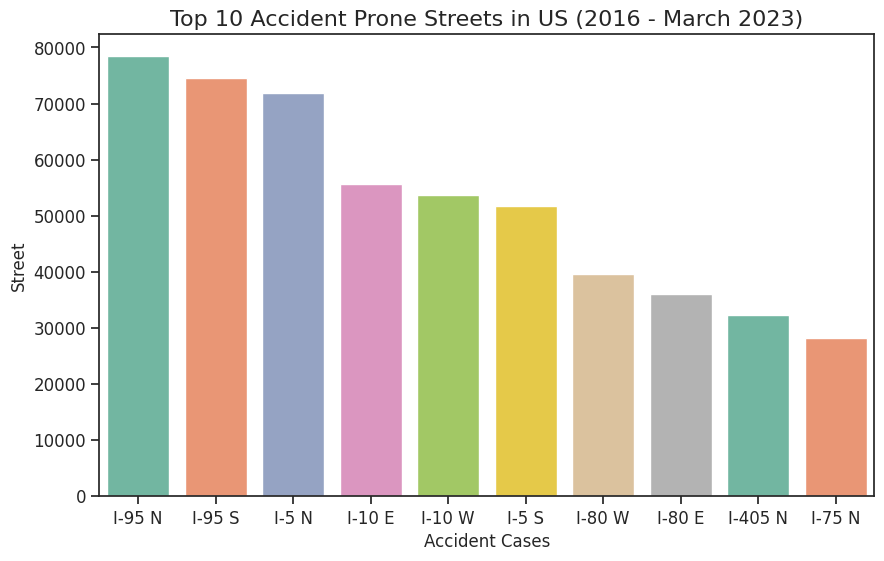

<Figure size 640x480 with 0 Axes>

In [110]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Cases', y='count', data=top_ten_streets_df, palette='Set2')

plt.title('Top 10 Accident Prone Streets in US (2016 - March 2023)', fontsize=16)
plt.xlabel('Accident Cases', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()
plt.savefig('top_10_streets.png')


## Step 1
Columns_drop

In [111]:
columns_to_drop = ['ID', 'Country', 'Source', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Street']
df = df.drop(columns=columns_to_drop, axis=1)

## Step 2
Fill null values of city with mode (within state)

In [112]:
# Calculate the mode (most frequent city) for each 'State' group
mode_cities = df.groupby('State')['City'].transform(lambda x: x.mode()[0])

# Fill missing 'City' values with the mode for their respective 'State' group
df['City'].fillna(mode_cities, inplace=True)


## step 3
Mean fill na

In [113]:
# Replace missing values with the mean of their respective states
columns_to_fill = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']

for column in columns_to_fill:
    df[column] = df[column].fillna(df.groupby('State')[column].transform('mean'))


We have decided to remove the columns 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Timezone', and 'Sunrise_Sunset' from the dataset. This decision was made because these columns collectively account for approximately 3% of the entire dataset's null values. Despite the removal of rows containing null values in these columns, we are left with a substantial 7,475,297 observations in our dataset, given its large size.

## Step 4
Checking for duplicates

In [114]:
print("Num of duplicates", df.duplicated().sum())
df = df.drop_duplicates()

Num of duplicates 102358


## Step 5
Handling Near Duplicates

In [115]:
print("No. of Weather Conditions:", len(df["Weather_Condition"].unique()))

# To view the complete list of 142 weather descriptions, run the following code
print("\nList of unique weather conditions:", list(df["Weather_Condition"].unique()))

No. of Weather Conditions: 145

List of unique weather conditions: ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan, 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', '

In [116]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

## Step 6

Drop null values

In [117]:
columns_to_check = ['Description','Visibility(mi)', 'Wind_Direction','Weather_Condition','Timezone','Sunrise_Sunset']
df.dropna(subset=columns_to_check, inplace=True)


We have replaced the boolean values 'True'->1 and 'False'->0, it will be easier for us to use these data for the next stage

## Step 7

One hot encoding

In [118]:
df = df.replace([True, False], [1, 0])

In [119]:
simple_sanity_check(df)

----------------------------------------------------------------------
No. of Rows: 7374621        No. of Columns: 37
----------------------------------------------------------------------
                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0        0.0              4
Start_Time          object               0        0.0        5957376
End_Time            object               0        0.0        6506291
Start_Lat          float64               0        0.0        2359092
Start_Lng          float64               0        0.0        2408799
Distance(mi)       float64               0        0.0          21832
Description         object               0        0.0        3651621
City                object               0        0.0          12244
County              object               0        0.0           1813
State               object               0        0.0             49
Zipcode             object               0        0.

In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7374621 entries, 0 to 7728393
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Distance(mi)       float64
 6   Description        object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Timezone           object 
 12  Airport_Code       object 
 13  Weather_Timestamp  object 
 14  Temperature(F)     float64
 15  Wind_Chill(F)      float64
 16  Humidity(%)        float64
 17  Pressure(in)       float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Wind_Speed(mph)    float64
 21  Precipitation(in)  float64
 22  Weather_Condition  object 
 23  Amenity            int64  
 24  Bump               int64  
 25  Crossing           int6

In [121]:
random_sample = df.sample(n=10000)


In [122]:
random_sample.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

## EDA 2, 3, 4

**EDA(2) -> Severity vs. Wind Speed**

**EDA(3) -> Severity vs. Precipitation**

**EDA(4) -> Severity vs. Visibility**

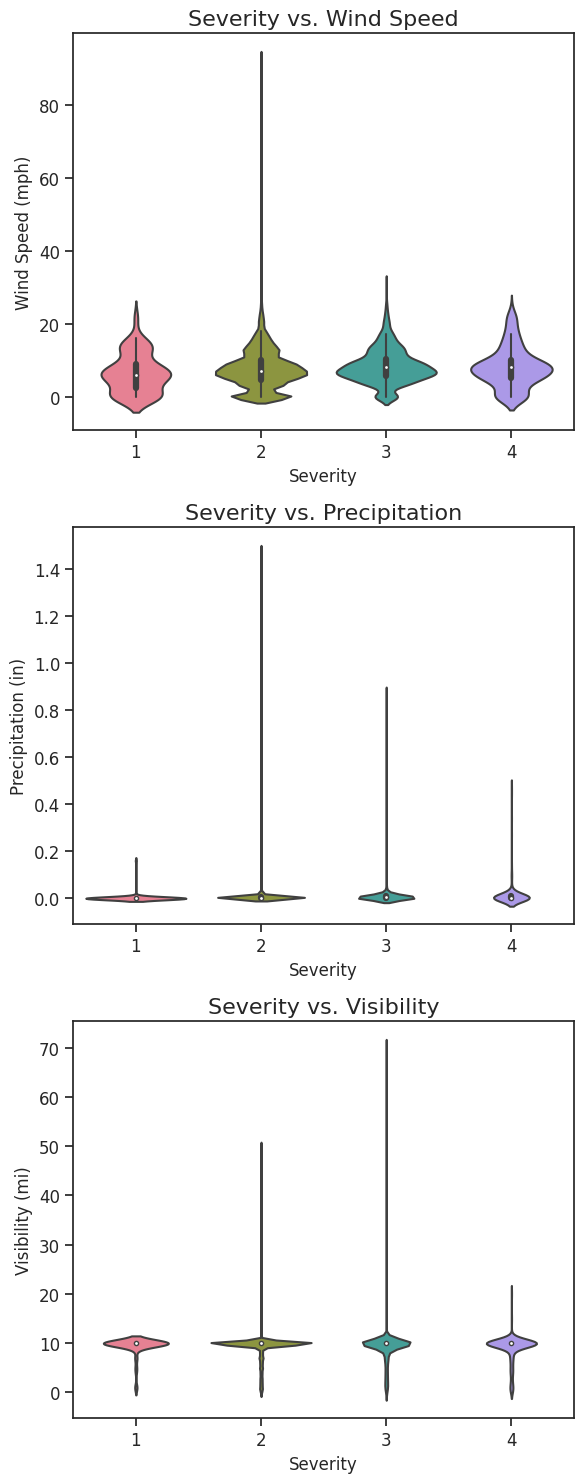

In [123]:
# Change Severity to Category
random_sample['Severity'] = random_sample['Severity'].astype('category')

# Create a set of axes and a figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))

# Violin plot for Wind Speed
sns.violinplot(data=random_sample, x='Severity', y='Wind_Speed(mph)', ax=axes[0], palette="husl")
axes[0].set_title('Severity vs. Wind Speed', fontsize=16)
axes[0].set_ylabel('Wind Speed (mph)', fontsize=12)
axes[0].set_xlabel('Severity', fontsize=12)

# Violin plot for Precipitation
sns.violinplot(data=random_sample, x='Severity', y='Precipitation(in)', ax=axes[1], palette="husl")
axes[1].set_title('Severity vs. Precipitation', fontsize=16)
axes[1].set_ylabel('Precipitation (in)', fontsize=12)
axes[1].set_xlabel('Severity', fontsize=12)

# Violin plot for Visibility
sns.violinplot(data=random_sample, x='Severity', y='Visibility(mi)', ax=axes[2], palette="husl")
axes[2].set_title('Severity vs. Visibility', fontsize=16)
axes[2].set_ylabel('Visibility (mi)', fontsize=12)
axes[2].set_xlabel('Severity', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Change Severity back to int if needed
random_sample['Severity'] = random_sample['Severity'].astype(int)


In [124]:
# Count the number of cases for each state
state_counts = random_sample["State"].value_counts().reset_index()

# Rename the columns to 'state_code' and 'cases'
state_counts.rename(columns={'index': 'state_code', 'State': 'cases'}, inplace=True)

# Sort the DataFrame by case counts in descending order
state_counts = state_counts.sort_values('cases', ascending=False)


## EDA 5
**Top 10 States with Highest Number of Accidents**

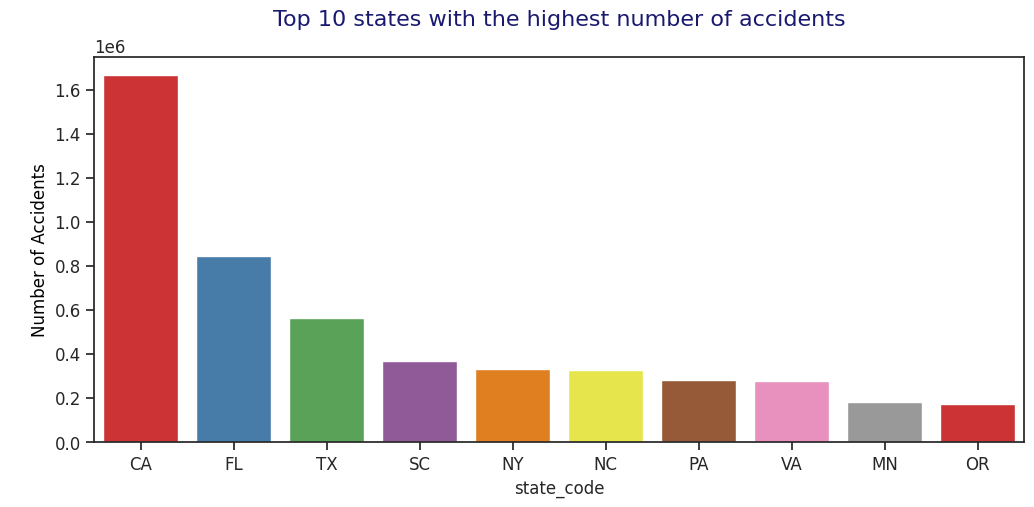

In [125]:
state_counts = df["State"].value_counts()
states = pd.DataFrame(state_counts).reset_index().sort_values('count', ascending=False)
states.rename(columns={'State':'state_code', 'count':'cases'}, inplace=True)
fig, ax = plt.subplots(figsize = (12,5))
top_10 = states[:10]
sns.barplot(x=top_10['state_code'], y=top_10['cases'], palette='Set1')
plt.title("Top 10 states with the highest number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.savefig("Top 10 states with the highest number of accidents.png")
plt.show()



## EDA - 6
**10 States with Lowest Number of Accidents**


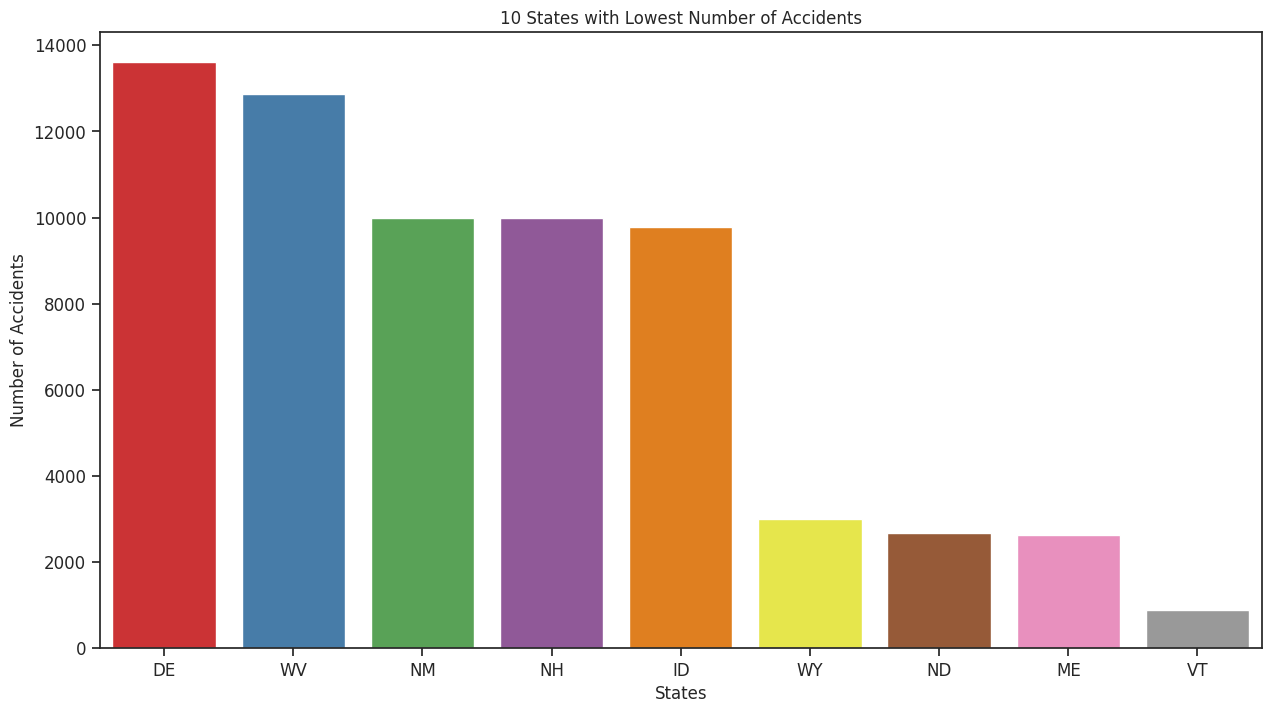

In [126]:
## Observing which states have most accidents
fig,axs = plt.subplots(figsize = (15,8))

x = state_counts[-10:-1].index.to_list()
y = state_counts[-10:-1].values.flatten()

sns.barplot(x=x, y = y, palette='Set1')
axs.tick_params(axis = 'x')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with Lowest Number of Accidents")
plt.savefig("10 States with Lowest Number of Accidents.png")
plt.show()

## EDA 7
**Top 10 Cities with Highest Number of Accidents**

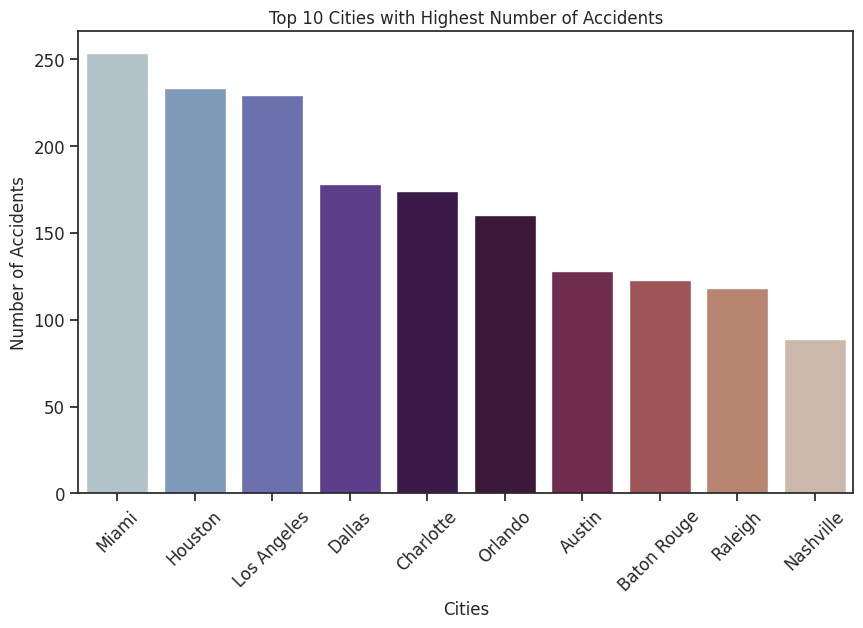

In [127]:
city_acc_counts = pd.DataFrame(random_sample['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City', "Number of Accidents"]
city_acc_counts.sort_values(by='Number of Accidents', ascending=False, inplace=True)
x = city_acc_counts['City'][:10].to_list()
y = city_acc_counts["Number of Accidents"][:10]

# Observing Top 20 cities with the most accidents
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y, ax=axs, palette='twilight')
axs.tick_params(axis='x', rotation=45)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.savefig("Top 10 Cities with Highest Number of Accidents.png")
plt.show()


## EDA - 8
**Accidents by Various Road Features and Severity**


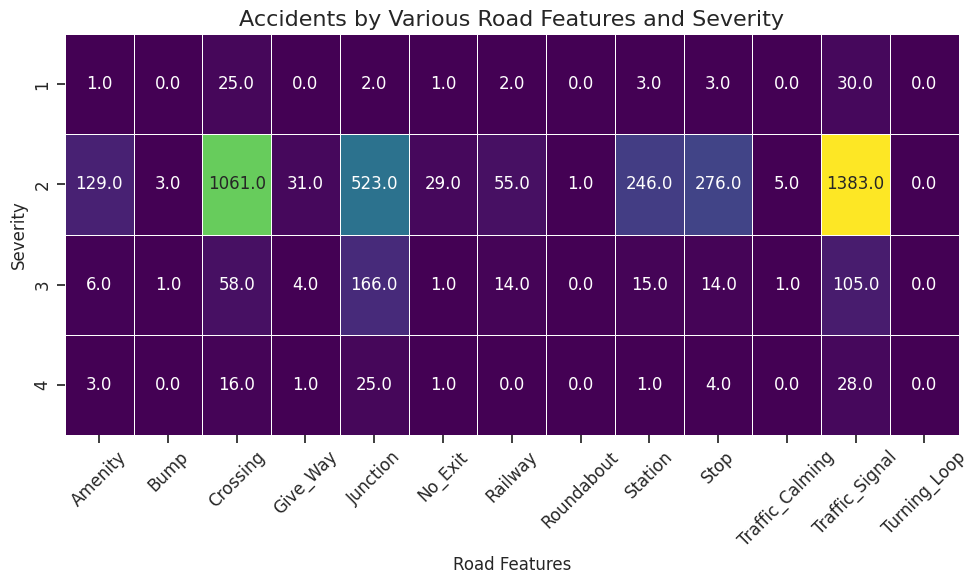

In [128]:
# Create a new dataset with boolean columns and severity
bool_severity_dataset = random_sample[['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                                      'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                                      'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

# Calculate the number of accidents for each combination of severity and boolean columns
accidents_by_bool_severity = bool_severity_dataset.groupby(['Severity']).sum()

# Create a heatmap to visualize the relationship between accident severity and boolean columns
plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_by_bool_severity, cmap='viridis', annot=True, fmt='.1f', linewidths=.5, cbar=False)
plt.title('Accidents by Various Road Features and Severity', fontsize=16)
plt.xlabel('Road Features', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Accidents by Various Road Features and Severity.png")
plt.show()


## EDA - 9
**Heatmap for Accidents on USA Map**

In [129]:
! pip install folium 
import folium
from folium.plugins import HeatMap

# Create a folium map centered at a specific location
m = folium.Map(location=[random_sample['Start_Lat'].mean(), random_sample['Start_Lng'].mean()], zoom_start=4.4)

# Convert your data to a list of coordinates
heatmap_data = random_sample[['Start_Lat', 'Start_Lng']].values.tolist()

# Create a HeatMap layer and add it to the folium map
HeatMap(heatmap_data).add_to(m)

# Display the folium map
m


**Just observe how well they will overlap or match with US Accidents**
![This is US population Density Heatmap](https://wellsr.com/python/assets/images/2022-08-19-us-population-heatmap.PNG)



In [130]:
object_columns_df = df.select_dtypes(include=['object']).copy()
# column names to drop from 'df'
columns_to_drop = object_columns_df.columns

# Drop the selected columns from 'df'
df.drop(columns=columns_to_drop, inplace=True)

In [131]:
object_columns_df["Start_Time"].isna().sum()

0

Let's start with some data manipulation, 
Changing the datetime values to different columns, since they are in string format at this point in time.

## Step 8
Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

state_encoder = LabelEncoder()
county_encoder = LabelEncoder()
city_encoder = LabelEncoder()
wind_direction_encoder = LabelEncoder()
weather_condition_encoder = LabelEncoder()
sunrise_sunset_encoder = LabelEncoder()

# Encode each column and add encoded columns to the DataFrame
object_columns_df["State_LabelEncoded"] = state_encoder.fit_transform(object_columns_df["State"])
object_columns_df["County_LabelEncoded"] = county_encoder.fit_transform(object_columns_df["County"])
object_columns_df["City_LabelEncoded"] = city_encoder.fit_transform(object_columns_df["City"])
object_columns_df["Wind_Direction_LabelEncoded"] = wind_direction_encoder.fit_transform(object_columns_df["Wind_Direction"])
object_columns_df["Weather_Condition_LabelEncoded"] = weather_condition_encoder.fit_transform(object_columns_df["Weather_Condition"])
object_columns_df["Sunrise_Sunset_LabelEncoded"] = sunrise_sunset_encoder.fit_transform(object_columns_df["Sunrise_Sunset"])

In [133]:
encoded_state_value = 5  # Replace with the label you want to inverse transform
original_state_category = wind_direction_encoder.inverse_transform([encoded_state_value])[0]
print(f"Encoded value {encoded_state_value} corresponds to State: {original_state_category}")


Encoded value 5 corresponds to State: East


In [134]:
object_columns_df

,Start_Time,End_Time,Description,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded
0,2016-02-08 05:46:00,2016-02-08 11:00:00,Right lane blocked due to accident on I-70 Eas...,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,Calm,Rain,Night,33,1092,2612,1,4,1
1,2016-02-08 06:07:59,2016-02-08 06:37:59,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,Calm,Rain,Night,33,578,9142,1,4,1
2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,SW,Cloudy,Night,33,335,11951,16,1,1
3,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,SW,Cloudy,Night,33,1092,2612,16,1,1
4,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,SW,Cloudy,Day,33,1092,2612,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2019-08-23 18:03:25,2019-08-23 18:32:01,At Market St - Accident.,Riverside,Riverside,CA,92501,US/Pacific,KRAL,2019-08-23 17:53:00,W,Clear,Day,3,1365,9250,20,0,0
7728390,2019-08-23 19:11:30,2019-08-23 19:38:23,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,San Diego,CA,92108,US/Pacific,KMYF,2019-08-23 18:53:00,SW,Clear,Day,3,1425,9652,16,0,0
7728391,2019-08-23 19:00:21,2019-08-23 19:28:49,At Glassell St/Grand Ave - Accident. in the ri...,Orange,Orange,CA,92866,US/Pacific,KSNA,2019-08-23 18:53:00,SSW,Cloudy,Day,3,1197,8088,15,1,0
7728392,2019-08-23 19:00:21,2019-08-23 19:29:42,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,Los Angeles,CA,90230,US/Pacific,KSMO,2019-08-23 18:51:00,SW,Clear,Day,3,944,2497,16,0,0


In [135]:
#  I think we made a mistake rather than headlessly converting the timezone we should have converted them to UTC
object_columns_df.Timezone.unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [136]:
object_columns_df['Start_Time'].isna().sum()

0

## EDA - 10
**Accidents by Hour of the Day**

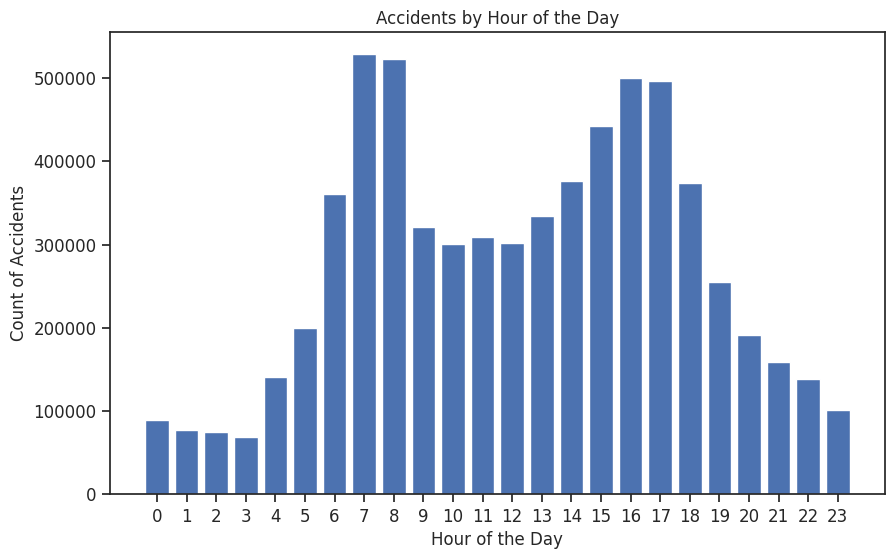

In [137]:
object_columns_df['Start_Time'] = pd.to_datetime(object_columns_df['Start_Time'] , errors='coerce')


hour_df = pd.DataFrame(object_columns_df.Start_Time.dt.hour.value_counts()).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(hour_df['Start_Time'], hour_df['count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(hour_df['Start_Time'])
plt.savefig("Accidents by Hour of the Day.png")
plt.show()

## Step 9
Feature Transformation
changing timezones to UTC for consistency

In [138]:
# Convert "End_Time" to datetime objects with error handling
object_columns_df["End_Time"] = pd.to_datetime(object_columns_df["End_Time"], errors='coerce')

# Define a dictionary mapping timezones to UTC offsets (hours)
timezone_offsets = {
    'US/Eastern': -5,   # Eastern Time (ET) UTC offset
    'US/Pacific': -8,   # Pacific Time (PT) UTC offset
    'US/Central': -6,   # Central Time (CT) UTC offset
    'US/Mountain': -7,  # Mountain Time (MT) UTC offset
    # Add more timezone offsets as needed
}

# Use NumPy broadcasting to add the corresponding UTC offset to "End_Time"
object_columns_df["End_Time_UTC"] = object_columns_df["End_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')

# Convert "Start_Time" to datetime objects
object_columns_df["Start_Time"] = pd.to_datetime(object_columns_df["Start_Time"], errors='coerce')

# Use NumPy broadcasting to add the corresponding UTC offset to "Start_Time"
object_columns_df["Start_Time_UTC"] = object_columns_df["Start_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')


In [139]:
object_columns_df.columns

Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC'],
      dtype='object')

In [140]:
object_columns_df.dropna(subset=["Timezone"], inplace=True)

## Step 10
Feature engineering

In [141]:
def extract_datetime_components(df, column_name):
    
    # Extract datetime components
    df[f'{column_name}_year'] = df[column_name].dt.year.astype(float)
    df[f'{column_name}_month'] = df[column_name].dt.month.astype(float)
    df[f'{column_name}_day'] = df[column_name].dt.day.astype(float)
    df[f'{column_name}_hour'] = df[column_name].dt.hour.astype(float)
    df[f'{column_name}_minute'] = df[column_name].dt.minute.astype(float)
    df[f'{column_name}_second'] = df[column_name].dt.second.astype(float)
    
    return df


In [142]:
object_columns_df = extract_datetime_components(object_columns_df, 'End_Time_UTC')
object_columns_df = extract_datetime_components(object_columns_df, 'Start_Time_UTC')

In [143]:
object_columns_df.columns

Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC',
       'End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day',
       'End_Time_UTC_hour', 'End_Time_UTC_minute', 'End_Time_UTC_second',
       'Start_Time_UTC_year', 'Start_Time_UTC_month', 'Start_Time_UTC_day',
       'Start_Time_UTC_hour', 'Start_Time_UTC_minute',
       'Start_Time_UTC_second'],
      dtype='object')

In [144]:
year_df = pd.DataFrame(object_columns_df.Start_Time_UTC.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time_UTC':'Cases'}).sort_values(by='Cases', ascending=True)


In [145]:
year_df['accident/day'] = year_df['count'] / 365

# Calculate cases per hour (assuming 365 days, 24 hours in a day)
year_df['accident/hour'] = year_df['count'] / (365 * 24)

## EDA - 11, 12

**EDA(11) -> Average Cases of Accident/hour in US (2016- March 2023)**
**EDA(12) -> Average Cases of Accident/Day in US (2016- March 2023)**

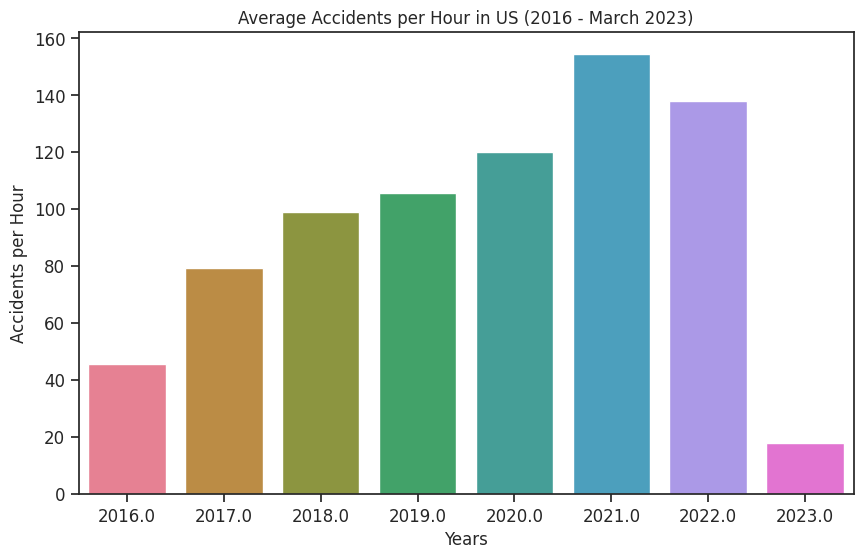

In [146]:
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Cases'], y=year_df['accident/hour'], palette='husl')
plt.title("Average Accidents per Hour in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Hour")
plt.savefig("Average Accidents per Hour in US (2016 - March 2023).png")
plt.show()


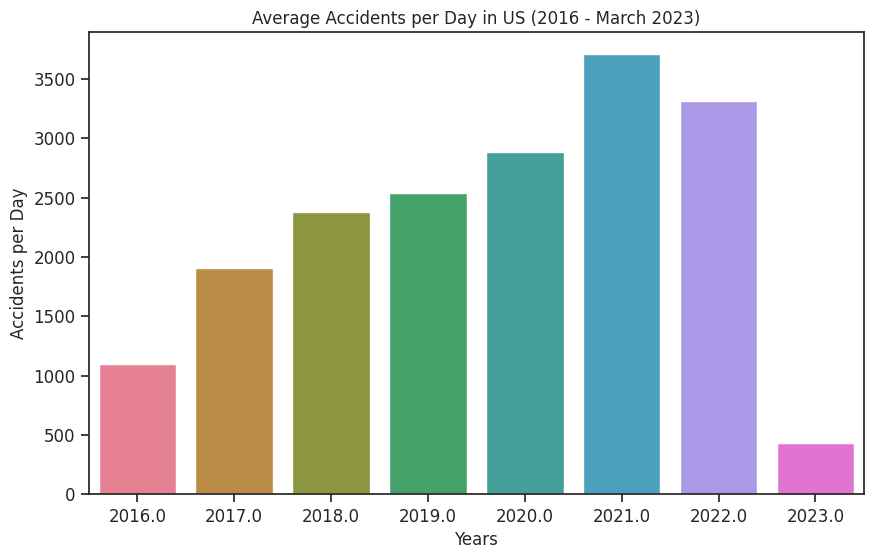

In [147]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Cases'], y=year_df['accident/day'], palette='husl')
plt.title("Average Accidents per Day in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Day")
plt.savefig("Average Accidents per Day in US (2016 - March 2023).png")
plt.show()


In [148]:
import calendar
month_df = pd.DataFrame(object_columns_df.Start_Time_UTC.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time_UTC':'Cases'})

month_names = list(calendar.month_name)[1:]
month_df['Month'] = month_names

## EDA - 13
**Road Accident Percentage for different months in US (2016 - March 2023)**

/tmp/ipykernel_32/3382574973.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 12)


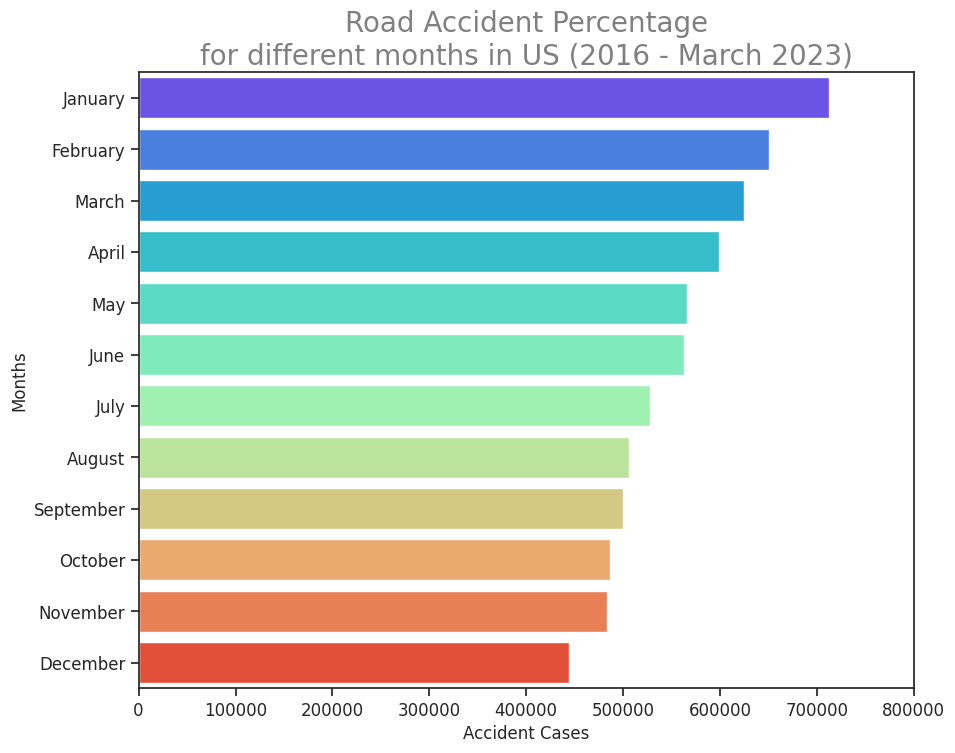

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors

fig, ax = plt.subplots(figsize=(10, 8))

# Change the colormap to 'viridis'
cmap = cm.get_cmap('viridis', 12)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax = sns.barplot(x=month_df['count'], y=month_df['Month'], palette='rainbow')
plt.title('Road Accident Percentage\nfor different months in US (2016 - March 2023)', size=20, color='grey')
plt.xlabel('Accident Cases')
plt.ylabel('Months')
plt.xlim(0, 800000)
plt.savefig("Road Accident Percentage for different months in US (2016 - March 2023).png")
plt.show()


In [150]:
object_columns_df.drop(
    ['State', 'County','Start_Time', 'End_Time', 'Weather_Timestamp', 'Sunrise_Sunset', 
     'Weather_Condition', 'Wind_Direction', 'Timezone', 'Airport_Code', 'Description',
    'End_Time_UTC', 'Start_Time_UTC', 'City', 'Zipcode'], axis=1, inplace=True)

In [151]:
object_columns_df

,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded,End_Time_UTC_year,End_Time_UTC_month,End_Time_UTC_day,End_Time_UTC_hour,End_Time_UTC_minute,End_Time_UTC_second,Start_Time_UTC_year,Start_Time_UTC_month,Start_Time_UTC_day,Start_Time_UTC_hour,Start_Time_UTC_minute,Start_Time_UTC_second
0,33,1092,2612,1,4,1,2016.0,2.0,8.0,6.0,0.0,0.0,2016.0,2.0,8.0,0.0,46.0,0.0
1,33,578,9142,1,4,1,2016.0,2.0,8.0,1.0,37.0,59.0,2016.0,2.0,8.0,1.0,7.0,59.0
2,33,335,11951,16,1,1,2016.0,2.0,8.0,2.0,19.0,27.0,2016.0,2.0,8.0,1.0,49.0,27.0
3,33,1092,2612,16,1,1,2016.0,2.0,8.0,2.0,53.0,34.0,2016.0,2.0,8.0,2.0,23.0,34.0
4,33,1092,2612,16,1,0,2016.0,2.0,8.0,3.0,9.0,7.0,2016.0,2.0,8.0,2.0,39.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,3,1365,9250,20,0,0,2019.0,8.0,23.0,10.0,32.0,1.0,2019.0,8.0,23.0,10.0,3.0,25.0
7728390,3,1425,9652,16,0,0,2019.0,8.0,23.0,11.0,38.0,23.0,2019.0,8.0,23.0,11.0,11.0,30.0
7728391,3,1197,8088,15,1,0,2019.0,8.0,23.0,11.0,28.0,49.0,2019.0,8.0,23.0,11.0,0.0,21.0
7728392,3,944,2497,16,0,0,2019.0,8.0,23.0,11.0,29.0,42.0,2019.0,8.0,23.0,11.0,0.0,21.0


In [152]:
# check when you run next time if 
# timestamps_UTC are still there and remove them

In [153]:
df = pd.concat([object_columns_df, df], axis=1)

In [154]:
df.head()

,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded,End_Time_UTC_year,End_Time_UTC_month,End_Time_UTC_day,End_Time_UTC_hour,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,33,1092,2612,1,4,1,2016.0,2.0,8.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,33,578,9142,1,4,1,2016.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,33,335,11951,16,1,1,2016.0,2.0,8.0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,33,1092,2612,16,1,1,2016.0,2.0,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,33,1092,2612,16,1,0,2016.0,2.0,8.0,3.0,...,0,0,0,0,0,0,0,0,1,0


## EDA - 14
**Accidents by Severity per Year**

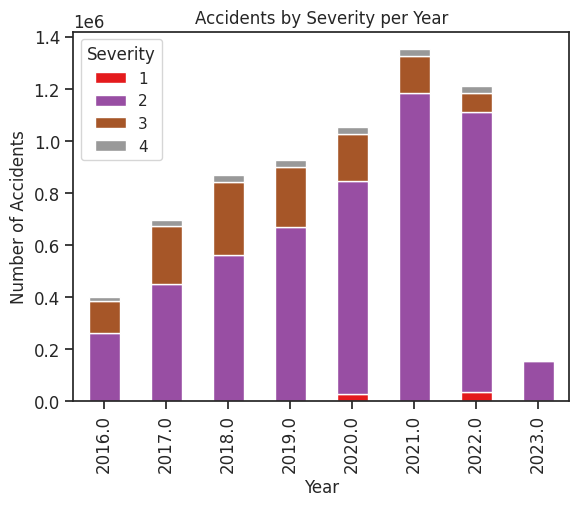

In [155]:
# Perform groupby operation
severity_grouped = df.groupby(['End_Time_UTC_year', 'Severity'])['Start_Lat'].count()

# Convert the result to a DataFrame
severity_df = severity_grouped.reset_index()

# Pivot the DataFrame
severity_pivot = severity_df.pivot(index='End_Time_UTC_year', columns='Severity', values='Start_Lat')

# Plot the stacked bar chart with a different colormap
ax = severity_pivot.plot.bar(stacked=True, colormap='Set1')

# Set the title and axis labels
plt.title("Accidents by Severity per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents by Severity per Year.png")
# Show the plot
plt.show()


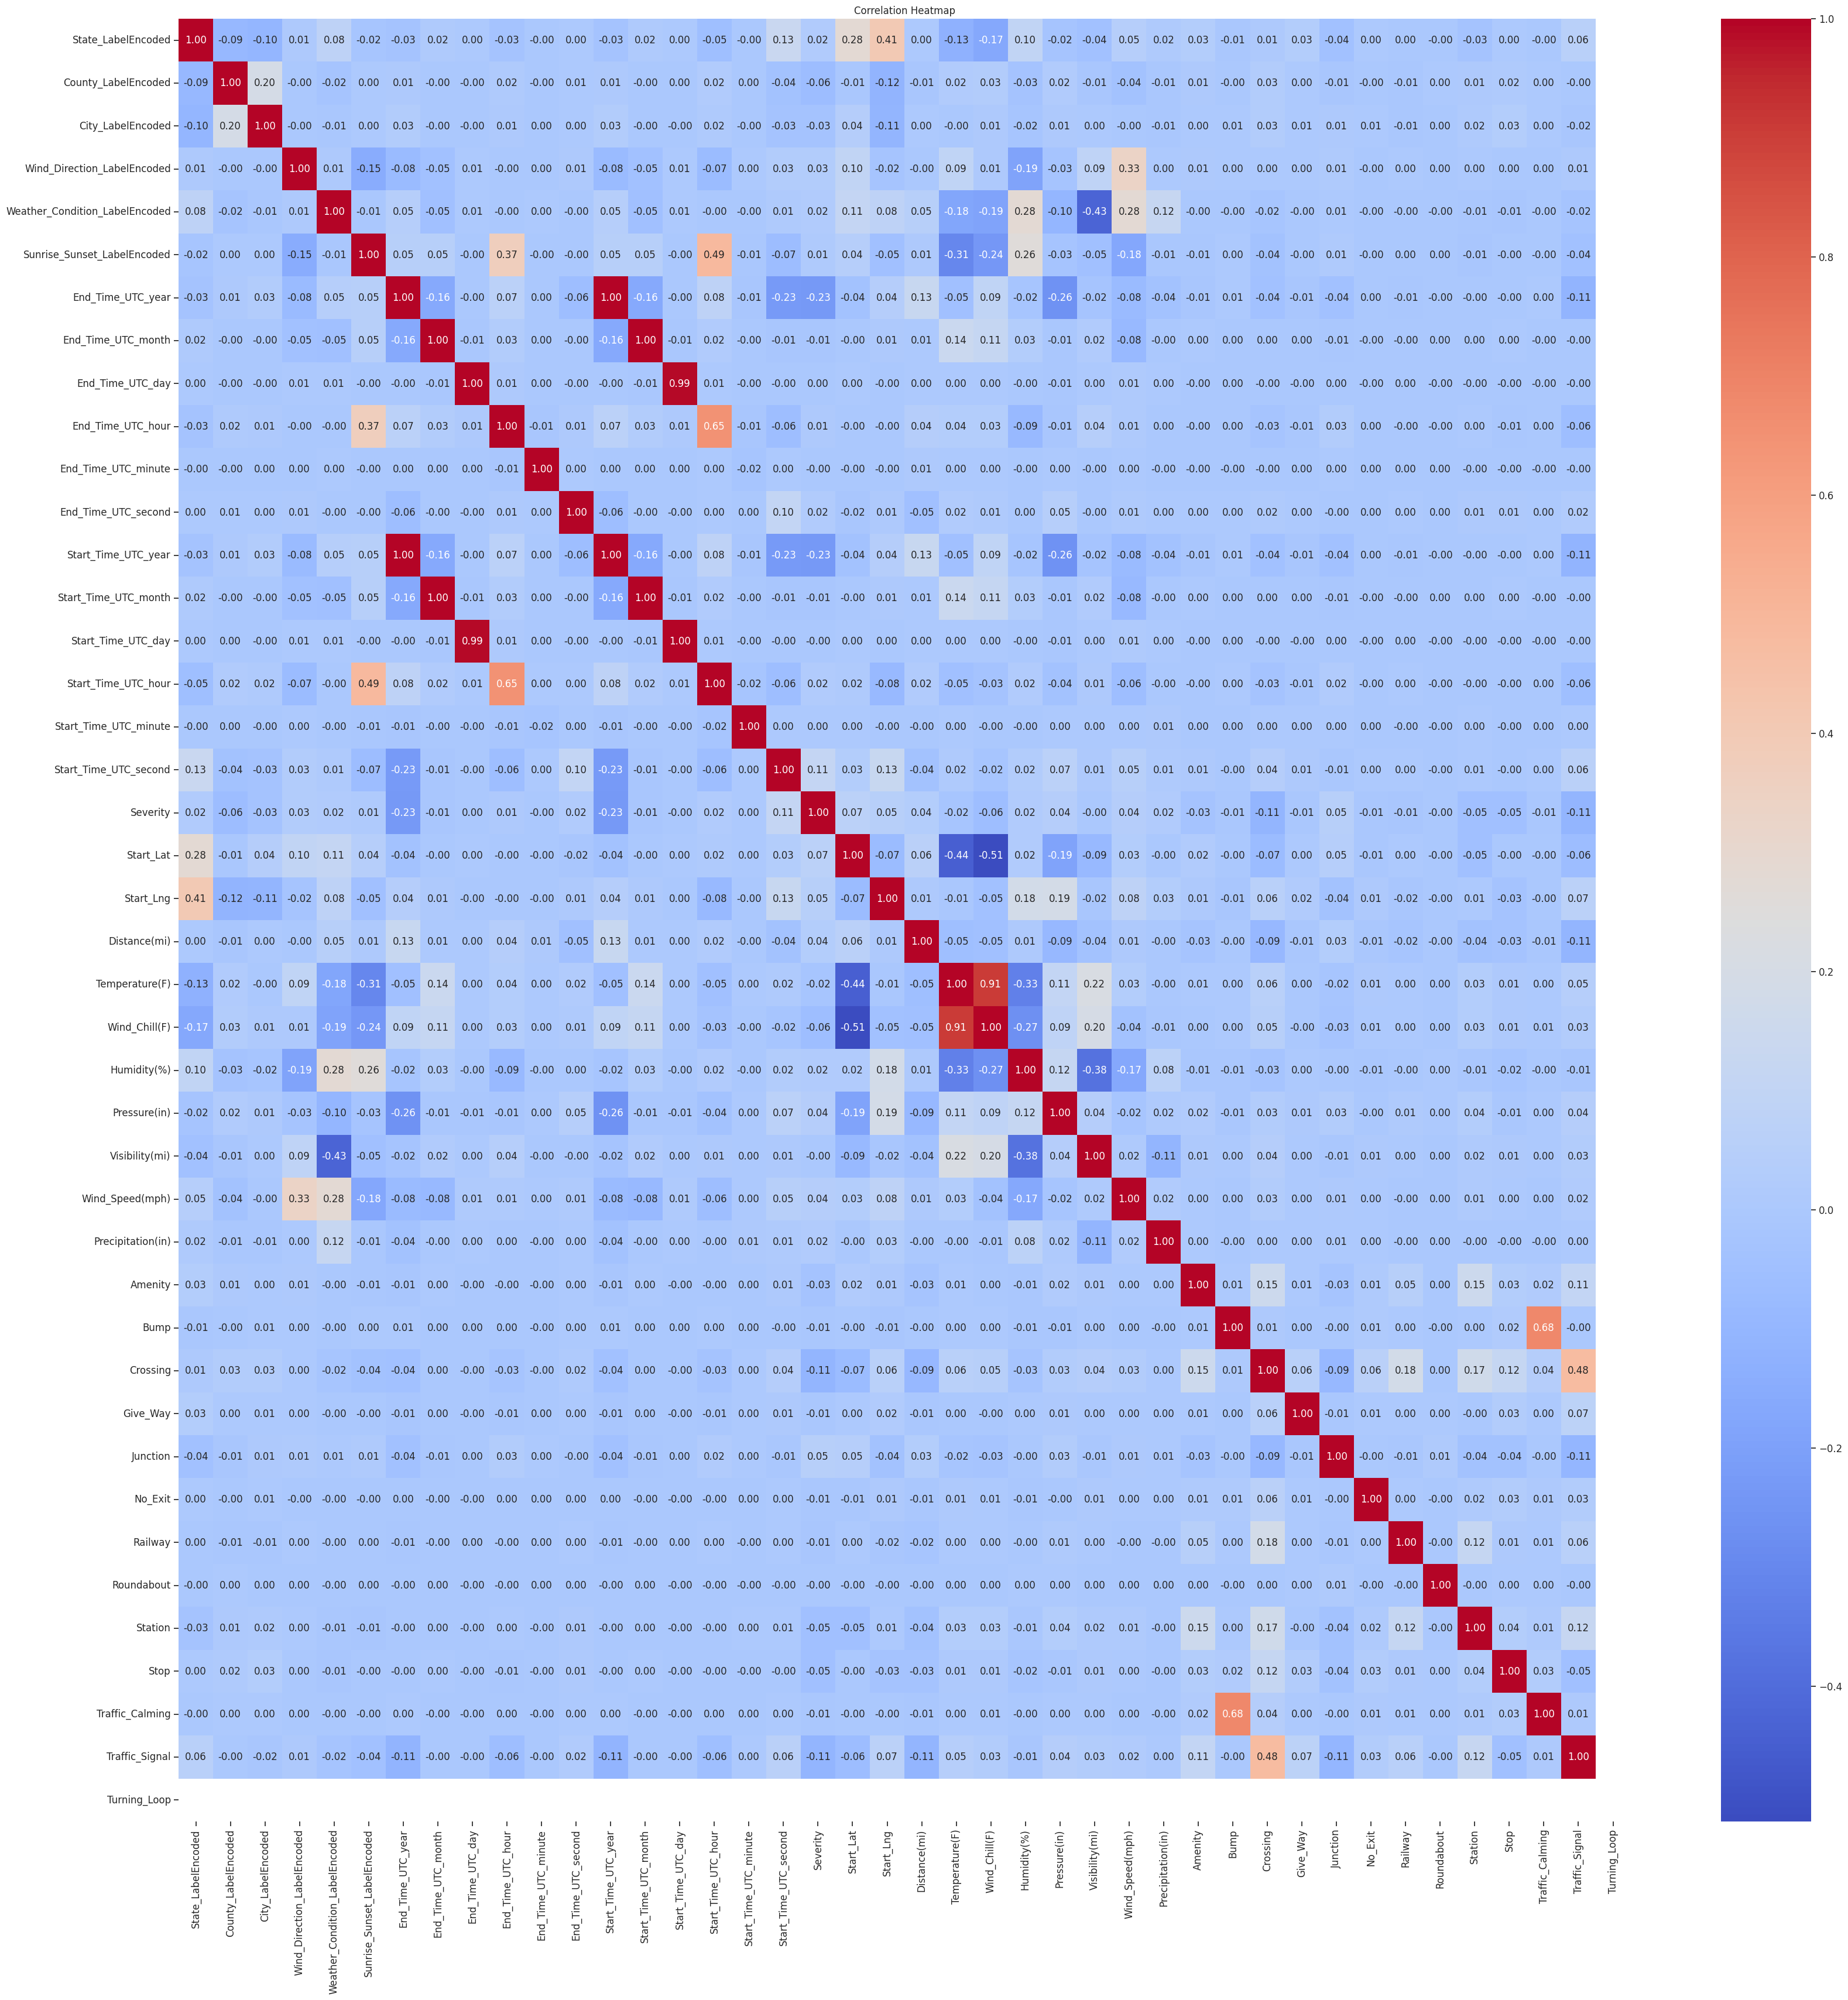

In [156]:
data = df  

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Correlation Heatmap.png")
plt.show()


In [157]:
# Create a mask for upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Fill the upper triangular matrix with True for highly correlated columns
highly_correlated = correlation_matrix.mask(mask).abs() > 0.80


# Find the columns to drop
columns_to_drop = [col for col in highly_correlated.columns if any(highly_correlated[col])]

# Print the columns that are being dropped
print("Columns to drop due to high correlation:", columns_to_drop)

# Drop the highly correlated columns from the DataFrame
data = data.drop(columns=columns_to_drop)

Columns to drop due to high correlation: ['End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day', 'Temperature(F)']
